In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_style("white")

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report

In [4]:
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
X = df.drop('target', axis='columns')
y = df.target

In [7]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


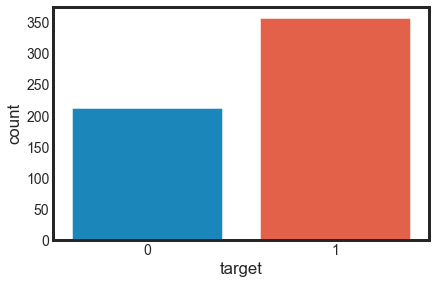

In [10]:
sns.countplot(df['target'],label='count')

In [11]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

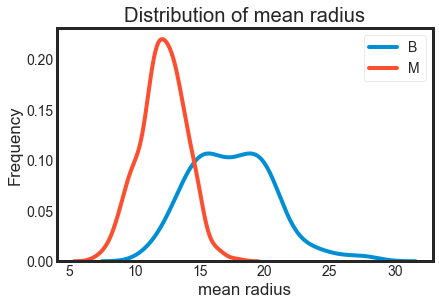

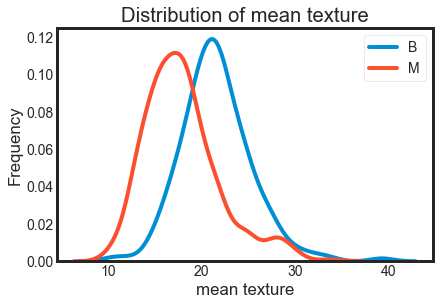

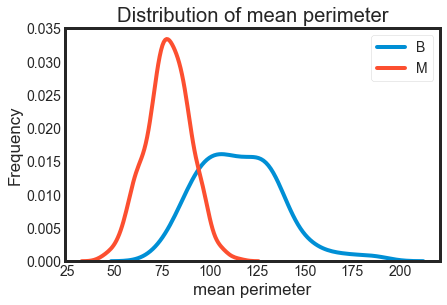

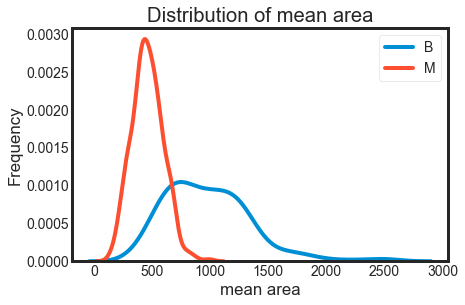

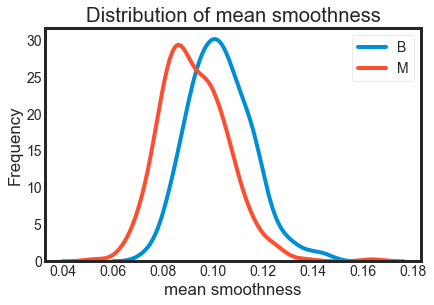

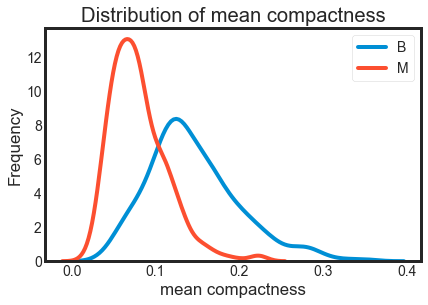

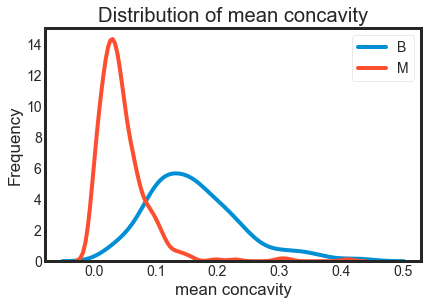

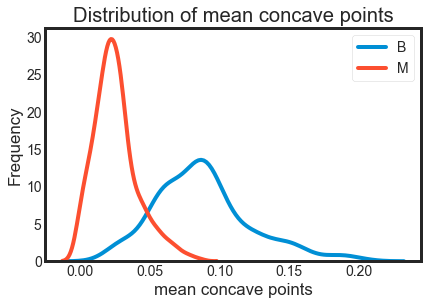

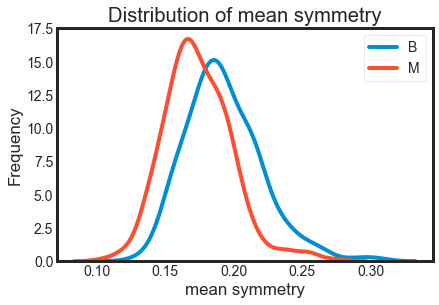

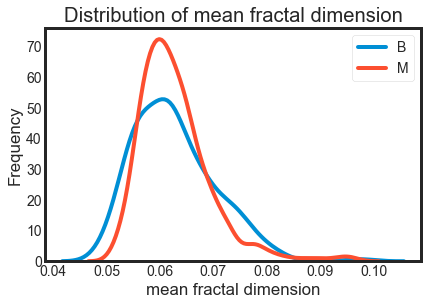

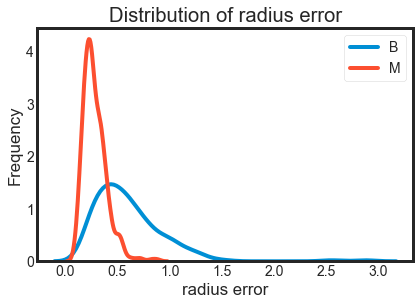

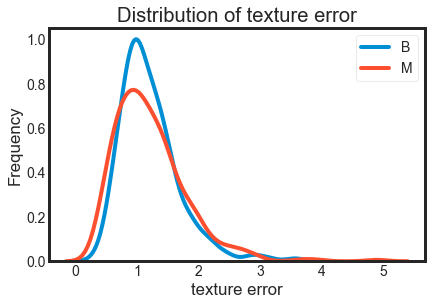

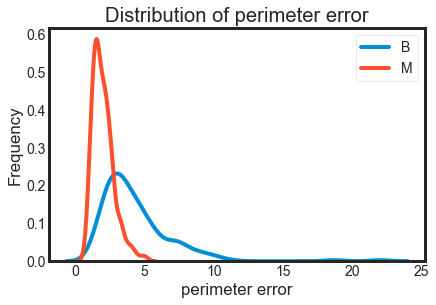

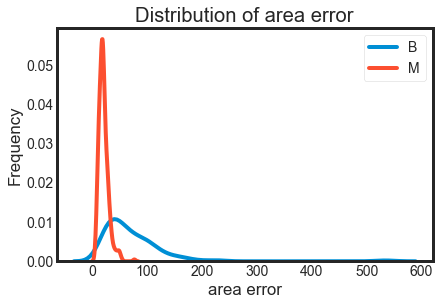

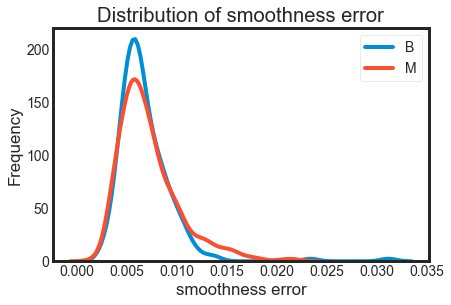

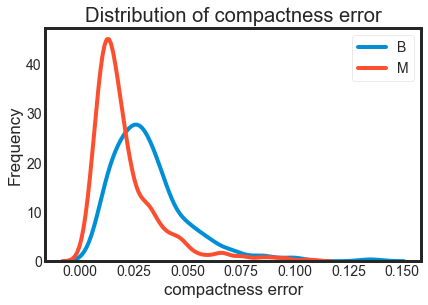

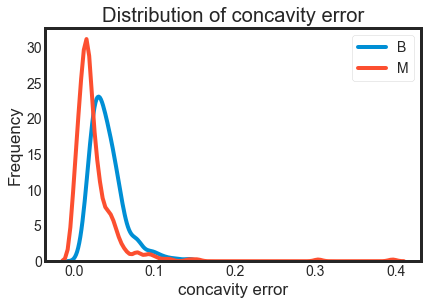

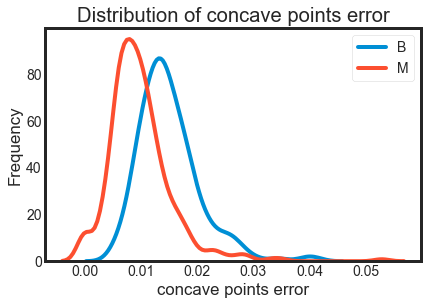

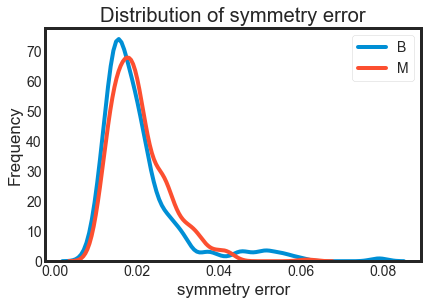

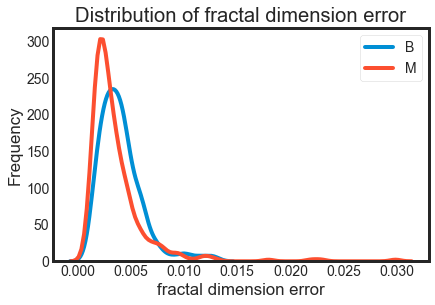

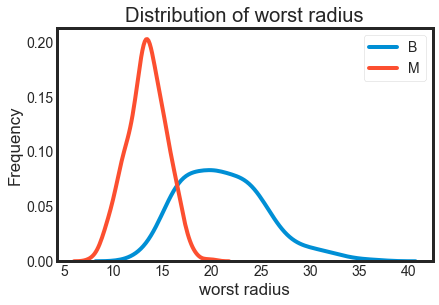

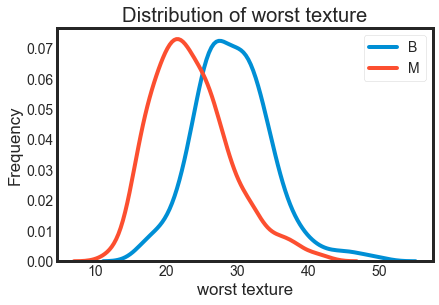

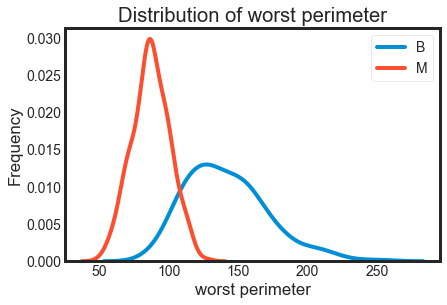

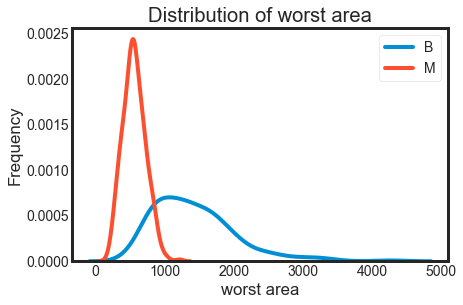

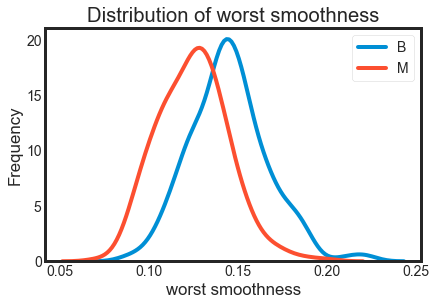

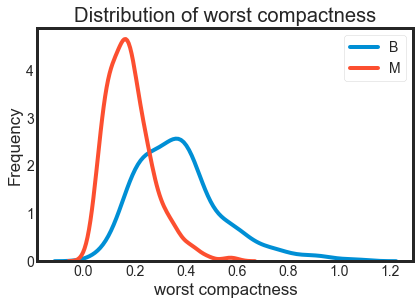

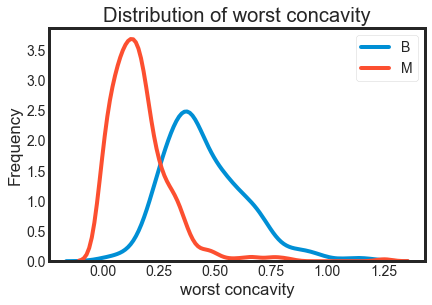

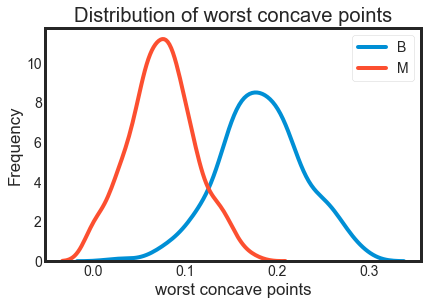

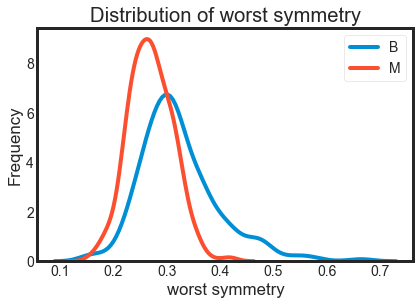

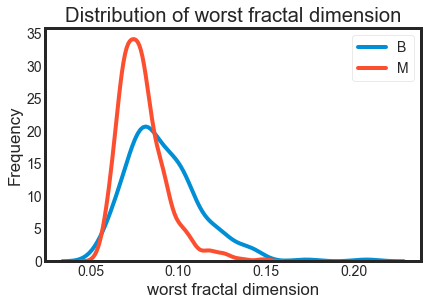

In [12]:
for column in X:
    plt.figure()
    column_data = X[column]
    sns.kdeplot(column_data[y == 0], label='B')
    sns.kdeplot(column_data[y == 1], label='M')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(column))

In [27]:
column_data[y == 1]

19     0.07259
20     0.08183
21     0.07773
37     0.06169
46     0.07409
        ...   
558    0.08004
559    0.08732
560    0.08321
561    0.05905
568    0.07039
Name: worst fractal dimension, Length: 357, dtype: float64

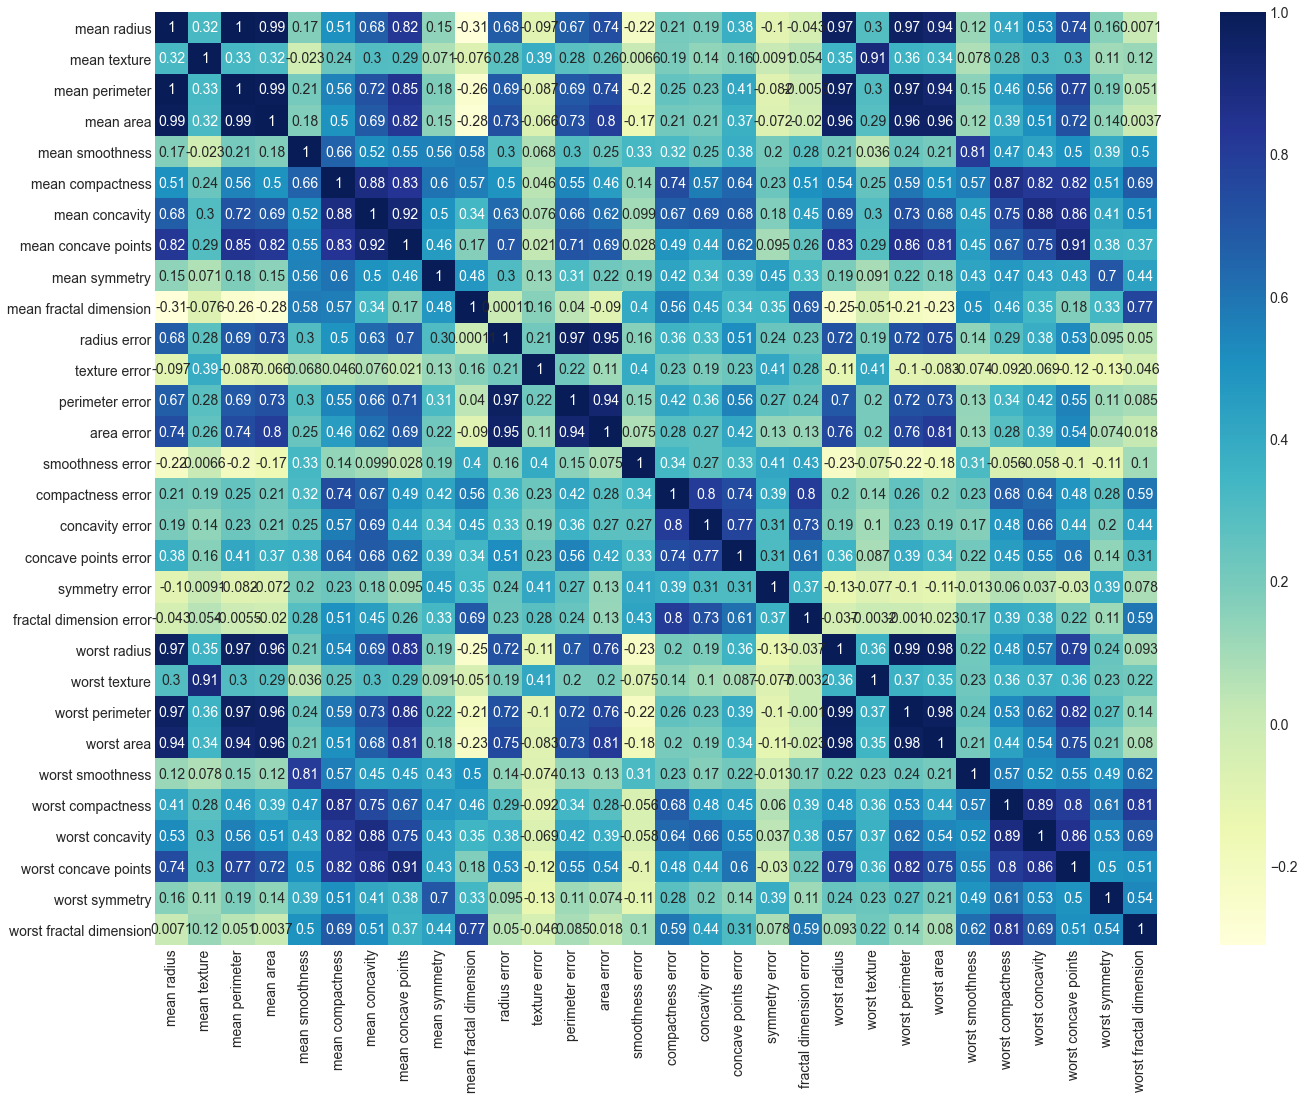

In [13]:
# Calculate and visualise correlations between features
plt.figure(figsize=(20, 16))
sns.heatmap(X.corr(), annot=True, cmap="YlGnBu")

In [14]:
#####
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

Text(0.5, 1.0, 'First two principal components of dataset')

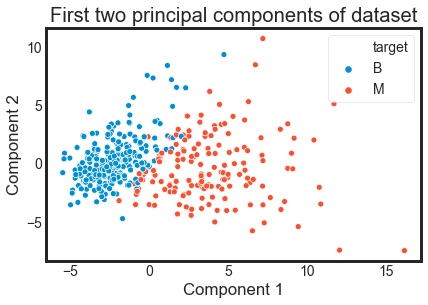

In [15]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])
X_pca = pipe.fit_transform(X_train, y_train)
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y_train.map({0:'M', 1:'B'}))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('First two principal components of dataset')

In [16]:
knn_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]+1),
    'knn__n_neighbors': np.arange(1, X_train.shape[1], 2)
}
knn_model = GridSearchCV(knn_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
knn_model.fit(X_train, y_train)

print('Best params: {}'.format(knn_model.best_params_))
print('Training Score: {}'.format(knn_model.score(X_train, y_train)))
print('CV Score: {}'.format(knn_model.best_score_))
print('Test Score: {}'.format(knn_model.score(X_test, y_test)))

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    5.6s


Best params: {'knn__n_neighbors': 11, 'pca__n_components': 9}
Training Score: 0.9788732394366197
CV Score: 0.974281805745554
Test Score: 0.951048951048951


[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:    6.9s finished


In [22]:
gnb_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('gnb', GaussianNB())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]+1)
}
gnb_model = GridSearchCV(gnb_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
gnb_model.fit(X_train, y_train)
print('Best params: {}'.format(gnb_model.best_params_))
print('Training Score: {}'.format(gnb_model.score(X_train, y_train)))
print('CV Score: {}'.format(gnb_model.best_score_))
print('Test Score: {}'.format(gnb_model.score(X_test, y_test)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best params: {'pca__n_components': 7}
Training Score: 0.9295774647887324
CV Score: 0.9251436388508892
Test Score: 0.916083916083916


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


In [17]:
lgr_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('lgr', LogisticRegression())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]//3),
    'lgr__C': np.logspace(0, 1, 10)
}
lgr_model = GridSearchCV(lgr_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
lgr_model.fit(X_train, y_train)
print('Best params: {}'.format(lgr_model.best_params_))
print('Training Score: {}'.format(lgr_model.score(X_train, y_train)))
print('CV Score: {}'.format(lgr_model.best_score_))
print('Test Score: {}'.format(lgr_model.score(X_test, y_test)))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Best params: {'lgr__C': 1.6681005372000588, 'pca__n_components': 8}
Training Score: 0.9882629107981221
CV Score: 0.9859097127222982
Test Score: 0.965034965034965


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    1.0s finished


In [18]:
rdf_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rdf', RandomForestClassifier())
])
param_grid = {
    'rdf__n_estimators': np.arange(200, 1001, 200),
    'rdf__max_depth': np.arange(1,4),
}
rdf_model = GridSearchCV(rdf_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
rdf_model.fit(X_train, y_train)
print('Best params: {}'.format(rdf_model.best_params_))
print('Training Score: {}'.format(rdf_model.score(X_train, y_train)))
print('CV Score: {}'.format(rdf_model.best_score_))
print('Test Score: {}'.format(rdf_model.score(X_test, y_test)))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.6s finished


Best params: {'rdf__max_depth': 3, 'rdf__n_estimators': 200}
Training Score: 0.9882629107981221
CV Score: 0.9554582763337894
Test Score: 0.9440559440559441


In [21]:
svc_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]//3),
    'svc__C': np.logspace(0, 3, 10),
    'svc__kernel': ['rbf'],
    'svc__gamma': np.logspace(-4, -3, 10)
}
svc_model = GridSearchCV(svc_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
svc_model.fit(X_train, y_train)
print('Best params: {}'.format(svc_model.best_params_))
print('Training Score: {}'.format(svc_model.score(X_train, y_train)))
print('CV Score: {}'.format(svc_model.best_score_))
print('Test Score: {}'.format(svc_model.score(X_test, y_test)))

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    4.7s


Best params: {'pca__n_components': 8, 'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Training Score: 0.9906103286384976
CV Score: 0.9906155950752394
Test Score: 0.972027972027972


[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:   10.4s finished


In [24]:
models = {
    'KNN': knn_model,
    'GaussianNB': gnb_model,
    'LogisticRegression': lgr_model,
    'RandomForests': rdf_model,
    'SVC': svc_model,
#    'XGBoost': xgb_model
}
y_stacked = pd.DataFrame({model_name: model.predict(X_train) for model_name, model in models.items()})
y_stacked_train, y_stacked_test, y_train_train, y_train_test = train_test_split(y_stacked, y_train, 
                                                                              random_state=0, stratify=y_train)
param_grid = {
    'C': np.logspace(0, 3, 10),
    'kernel': ['rbf'],
    'gamma': np.logspace(-3, 3, 10)
}
stacked_model = GridSearchCV(SVC(), param_grid=param_grid, verbose=1, n_jobs=-1)
stacked_model.fit(y_stacked_train, y_train_train)
print('Best params: {}'.format(stacked_model.best_params_))
print('Training Score: {}'.format(stacked_model.score(y_stacked_train, y_train_train)))
print('CV Score: {}'.format(stacked_model.best_score_))
print('Test Score: {}'.format(stacked_model.score(y_stacked_test, y_train_test)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


Best params: {'C': 1.0, 'gamma': 2.154434690031882, 'kernel': 'rbf'}
Training Score: 0.9937304075235109
CV Score: 0.99375
Test Score: 0.9719626168224299


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished


In [25]:
y_stacked = pd.DataFrame({model_name: model.predict(X_test) for model_name, model in models.items()})
y_pred = stacked_model.predict(y_stacked)
print('Overall Accuracy Score: {:.2%}'.format(accuracy_score(y_test, y_pred)))
print('Classification report:')
print(classification_report(y_test, y_pred))

Overall Accuracy Score: 94.41%
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.98      0.93      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143

